- #### PROYECTO 2 ####

***Data Analyst***

**TELECOMUNICACIONES**

importacion de librerias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

 Configuracion

In [2]:
warnings.filterwarnings("ignore")

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

2. ETL

 - 2.1  CARGA DE DATOS

En la siguiente celda se importaron las hojas convenientes para el posterior analisis del archivo "internet" extraido desde 
m

In [3]:
acc_x_rangos = pd.read_excel(
    r"C:\Users\Rocio\Desktop\Recursos,memorias\DataSets\Internet.xlsx",
    sheet_name="Accesos por rangos",
)

totales_acc_x_rangos = pd.read_excel(
    r"C:\Users\Rocio\Desktop\Recursos,memorias\DataSets\Internet.xlsx",
    sheet_name="Totales Accesos por rango",
)

totales_acc_x_tec = pd.read_excel(
    r"C:\Users\Rocio\Desktop\Recursos,memorias\DataSets\Internet.xlsx",
    sheet_name="Totales Accesos Por Tecnología",
)

acc_x_tec = pd.read_excel(
    r"C:\Users\Rocio\Desktop\Recursos,memorias\DataSets\Internet.xlsx",
    sheet_name="Accesos Por Tecnología",
)

penetracion_hogares_int = pd.read_excel(
    r"C:\Users\Rocio\Desktop\Recursos,memorias\DataSets\Internet.xlsx",
    sheet_name="Penetracion-hogares"
)

internet_ingresos = pd.read_excel(
    r"C:\Users\Rocio\Desktop\Recursos,memorias\DataSets\Internet.xlsx",
    sheet_name="Ingresos ",
)

vel_media_prov = pd.read_excel(
    r"C:\Users\Rocio\Desktop\Recursos,memorias\DataSets\Internet.xlsx",
    sheet_name="Velocidad % por prov",
)

totales_vmd = pd.read_excel(
    r"C:\Users\Rocio\Desktop\Recursos,memorias\DataSets\Internet.xlsx",
    sheet_name="Totales VMD",
)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Rocio\\Desktop\\Recursos,memorias\\DataSets\\Internet.xlsx'

en la siguiente celda se cargan las hojas de los archivos para el posterior analisis extraido desde https://indicadores.enacom.gob.ar/datos-abiertos 

In [ ]:
fija_pen_totales = pd.read_excel(
    r"C:\Users\Rocio\Desktop\Recursos,memorias\DataSets\telefonia_fija.xlsx",
    sheet_name="Fija_penetracion_tot",
)

fija_ingreso = pd.read_excel(
    r"C:\Users\Rocio\Desktop\Recursos,memorias\DataSets\telefonia_fija.xlsx",
    sheet_name="Fija_ingresos",
)

movil_penetracion = pd.read_excel(
    r"C:\Users\Rocio\Desktop\Recursos,memorias\DataSets\Telefonia_movil.xlsx",
    sheet_name="Penetracion",
)
movil_ingresos = pd.read_excel(
    r"C:\Users\Rocio\Desktop\Recursos,memorias\DataSets\Telefonia_movil.xlsx",
    sheet_name="Ingresos",
)

tv_penetracion_prov = pd.read_excel(
    r"C:\Users\Rocio\Desktop\Recursos,memorias\DataSets\Television.xlsx",
    sheet_name="Accesos_prov_TV",
)

tv_ingresos = pd.read_excel(
    r"C:\Users\Rocio\Desktop\Recursos,memorias\DataSets\Television.xlsx",
    sheet_name="Ingresos_TV",
)

In [ ]:
habitantes_censo= pd.read_excel(
    r'C:\Users\Rocio\Desktop\Recursos,memorias\DataSets\censo_habitantes.xlsx'
)

- Para evitar repetir el codigo y tener toda la informacion ordenada y mas legible se crreo un diccionario que contiene todos los dataframes de los datos anteriormente cargados
  

*" creacion de dataframes, un diccionario de dataframes"*

In [ ]:
dic_df = {
    "Accesos por rangos": acc_x_rangos,
    "Totales accesos por rangos": totales_acc_x_rangos,
    "Totales accesos por tecnología": totales_acc_x_tec,
    "Accesos por tecnología": acc_x_tec,
    "Penetración hogares internet": penetracion_hogares_int ,
    "Ingresos de internet": internet_ingresos,
    "Velocidad por provincia": vel_media_prov,
    "Totales VMD": totales_vmd,
    "Fija penetración totales": fija_pen_totales,
    "Fija ingresos": fija_ingreso,
    "Móvil penetración": movil_penetracion,
    "Móvil ingresos": movil_ingresos,
    "TV penetración provincia": tv_penetracion_prov,
    "TV ingresos": tv_ingresos,
    "censo": habitantes_censo,
    
}

*Función para explorar los datos*

- *Se creo la siguiente funcion "explorar_df" la cual devuelve el nombre del dataframe , las dimensiones, nombre de columnas, el tippo de dato  y la cantidad de nulos*

In [ ]:
def explorar_df(nombre, df):
    print(f"Explorando: {nombre}")
    print(f"Dimensiones: {df.shape}")
    print(f"Columnas: {df.columns.tolist()}")
    print(f"Tipos de datos:\n{df.dtypes}")
    print(f"Nulos por columna:\n{df.isnull().sum()}")
    print("-" * 50)

*Se itera sobre el diccionario, se aplica la funcion y se eliminan duplicados si existen*

In [ ]:
for nombre, df in dic_df.items():
    df.drop_duplicates()
    explorar_df(nombre, df)

Explorando: Accesos por rangos
Dimensiones: (1000, 12)
Columnas: ['Año', 'Trimestre', 'Provincia', 'HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS', 'Total']
Tipos de datos:
Año                      int64
Trimestre                int64
Provincia               object
HASTA 512 kbps         float64
+ 512 Kbps - 1 Mbps    float64
+ 1 Mbps - 6 Mbps      float64
+ 6 Mbps - 10 Mbps     float64
+ 10 Mbps - 20 Mbps    float64
+ 20 Mbps - 30 Mbps    float64
+ 30 Mbps              float64
OTROS                  float64
Total                  float64
dtype: object
Nulos por columna:
Año                    0
Trimestre              0
Provincia              0
HASTA 512 kbps         0
+ 512 Kbps - 1 Mbps    0
+ 1 Mbps - 6 Mbps      0
+ 6 Mbps - 10 Mbps     0
+ 10 Mbps - 20 Mbps    0
+ 20 Mbps - 30 Mbps    0
+ 30 Mbps              0
OTROS                  6
Total                  0
dtype: int64
------

conclusiones de la 1ra exploracion:

- *"Analizando el periodo de tiempo se tomará como relevante la fecha a patir del año 2020 con sus respectivos trimestres, debido al acontecimiento de la pandemia mundial #COVID-19" ya que ha genereado un pundo de inflexión,impulsados por la transformación digital y la creciente demanda de conectividad. Ha genereado un cambio contundente en el impulso de la tecnologia y la comunicacion"*

- *Se puede observar que en algunos de los dataframe se encuentran sin nulos*

- *las columnas año y trimestre presentan tipo de datos diferentes en el dataframe "accesos por tecnologia"*



- *Algunos datos  en año y trimestre aparecen con errores por lo cual se limpiaran las columnas y se cambiaran el tipo de dato a int*

In [ ]:
print(dic_df["Accesos por tecnología"]["Año"].unique())

[2024 2023 2022 2021 2020 2019 '2019 *' 2018 2017 2016 2015 2014 nan '*']


- *las filas que presentan problemas de codificacion son las que no van a utilizarse por lo que se filtran solo las que contienen años igual mayores a 2020*
 
- *Se accede al valor año dentro de la clave accesos por tecnologia del diccionario de dataframes.lo convierte a str para
poder seleccionar los 4 primeros  y luego se aplica una funcion lambda que corrobora si todos los caracteres son digitos , los convierte en numero, finalmente compara, finalmente selecciona solo los que son mayores o iguales a 2020*

In [ ]:
dic_df["Accesos por tecnología"] = dic_df["Accesos por tecnología"][
    dic_df["Accesos por tecnología"]["Año"]
    .astype(str)
    .str[:4]
    .apply(lambda x: x.isdigit() and int(x) >= 2020)
]

In [ ]:
print(dic_df["Accesos por tecnología"]["Año"].unique())

[2024 2023 2022 2021 2020]


In [ ]:
for nombre, df in dic_df.items():
    explorar_df(nombre, df)

Explorando: Accesos por rangos
Dimensiones: (1000, 12)
Columnas: ['Año', 'Trimestre', 'Provincia', 'HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS', 'Total']
Tipos de datos:
Año                      int64
Trimestre                int64
Provincia               object
HASTA 512 kbps         float64
+ 512 Kbps - 1 Mbps    float64
+ 1 Mbps - 6 Mbps      float64
+ 6 Mbps - 10 Mbps     float64
+ 10 Mbps - 20 Mbps    float64
+ 20 Mbps - 30 Mbps    float64
+ 30 Mbps              float64
OTROS                  float64
Total                  float64
dtype: object
Nulos por columna:
Año                    0
Trimestre              0
Provincia              0
HASTA 512 kbps         0
+ 512 Kbps - 1 Mbps    0
+ 1 Mbps - 6 Mbps      0
+ 6 Mbps - 10 Mbps     0
+ 10 Mbps - 20 Mbps    0
+ 20 Mbps - 30 Mbps    0
+ 30 Mbps              0
OTROS                  6
Total                  0
dtype: int64
------

- *Se convierte la columna Año de acceso por tecnologia a tipo Int*

In [ ]:
dic_df["Accesos por tecnología"]["Año"] = dic_df["Accesos por tecnología"][
    "Año"
].astype(int)

- *Se imprimen los valores unicos de trimestre de la clave accesos por tecnologia del diccionario dic_df*

In [ ]:
print(dic_df["Accesos por tecnología"]["Trimestre"].unique())

[2 1 4 3]


- *Se convierte Trimestre a int*

In [ ]:
dic_df["Accesos por tecnología"]["Trimestre"] = dic_df["Accesos por tecnología"][
    "Trimestre"
].astype(int)

- *Se crea la funcion filtro_anio para seleccionar solo los datos a partir del 2020*

In [ ]:
def filtro_anio(df, col_anio="Año"):
    if col_anio in df.columns:
        return df[df[col_anio] >= 2020]
    return df

- *Se itera el dic_df y se aplica la funcion*

In [ ]:
for nombre, df in dic_df.items():
    dic_df[nombre] = filtro_anio(df)
    print(f"Datos de {nombre}: {dic_df[nombre].shape}")

Datos de Accesos por rangos: (432, 12)
Datos de Totales accesos por rangos: (18, 11)
Datos de Totales accesos por tecnología: (18, 9)
Datos de Accesos por tecnología: (431, 9)
Datos de Penetración hogares internet: (432, 4)
Datos de Ingresos de internet: (18, 4)
Datos de Velocidad por provincia: (432, 4)
Datos de Totales VMD: (18, 4)
Datos de Fija penetración totales: (18, 4)
Datos de Fija ingresos: (18, 3)
Datos de Móvil penetración: (18, 4)
Datos de Móvil ingresos: (18, 4)
Datos de TV penetración provincia: (432, 4)
Datos de TV ingresos: (18, 4)
Datos de censo: (26, 2)


In [ ]:
dic_df["Accesos por tecnología"]["Trimestre"].value_counts()

Trimestre
2    120
1    119
4     96
3     96
Name: count, dtype: int64

*Al observar los datos originales se distinguio que en el archivo internet, hoja ingresos, columna año, fila 7, el año tiene un error de tipeo 2033*

In [ ]:
dic_df["Ingresos de internet"]["Año"] = dic_df["Ingresos de internet"]["Año"].replace(
    2033, 2023
)

- *A continuacion se grafica la distribucion de los datos*

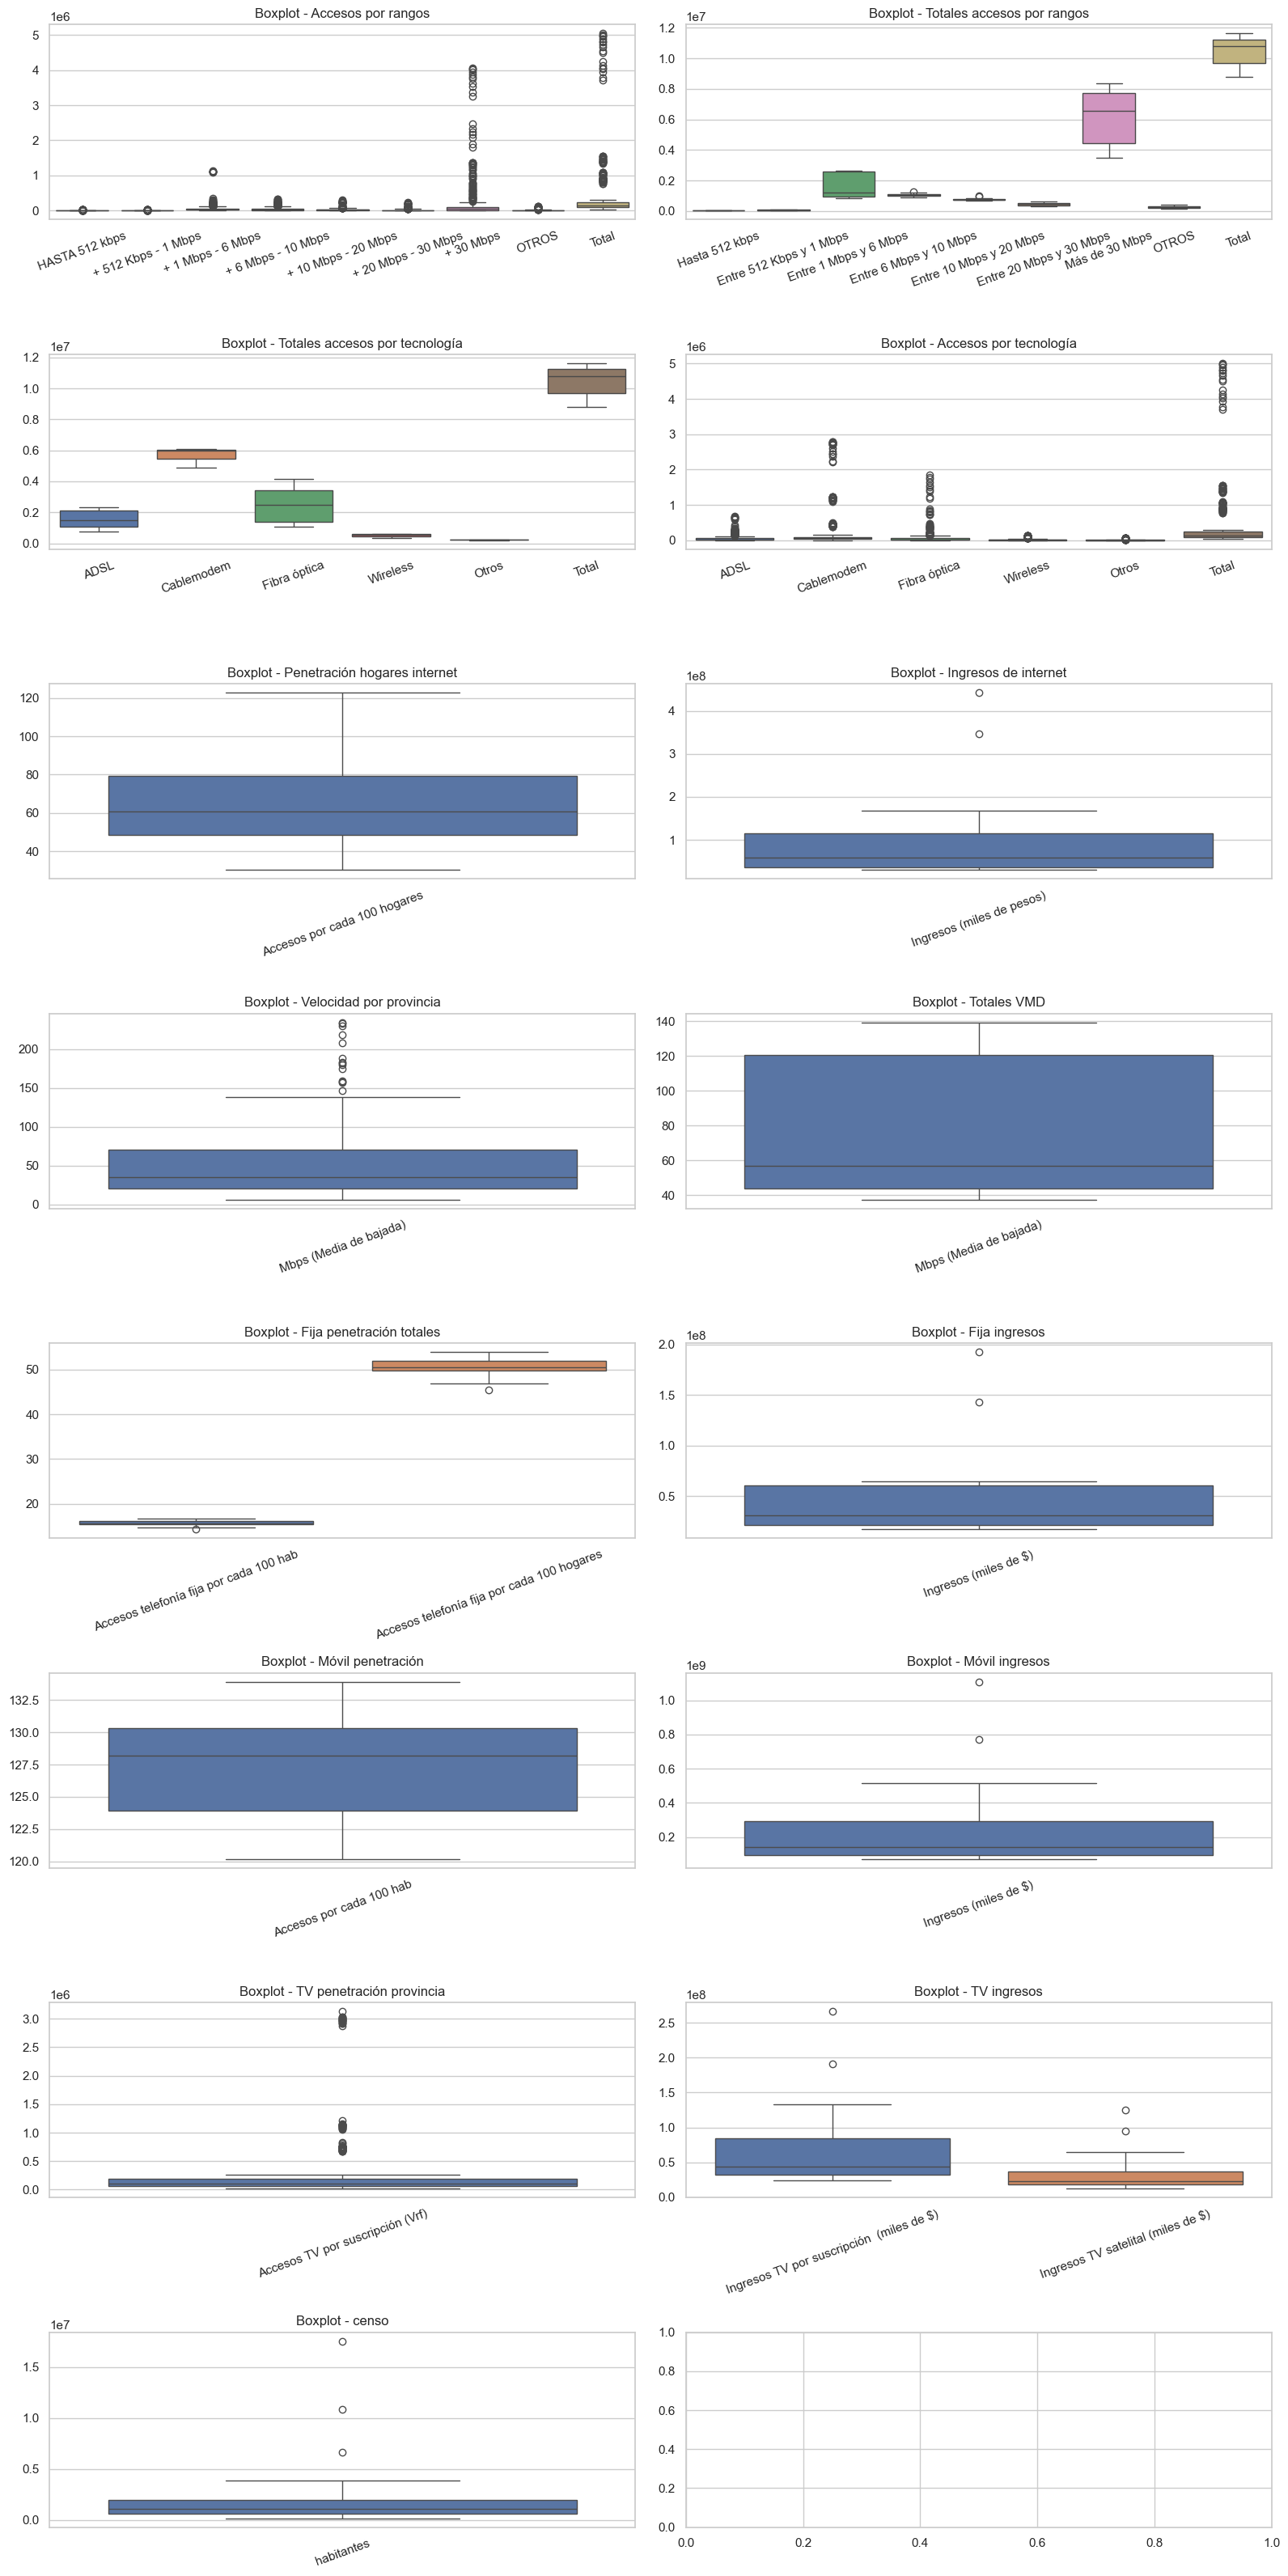

In [ ]:
num_dfs = len(dic_df)  # Cantidad de DataFrames
cols = 2  # Número de columnas en la cuadrícula
rows = (num_dfs // cols) + (num_dfs % cols > 0)  # Se calculan las filas necesarias

fig, axes = plt.subplots(rows, cols, figsize=(16, 4 * rows))  
axes = axes.flatten()  # Se asegura que los ejes sean un array plano

#Se recorre el dataframe y se ignoran las columnas año y trimestre al ser varialbles categoricas ordinales.
for i, (nombre_df, df) in enumerate(dic_df.items()):
    df_numeric = df.select_dtypes(include=['number']).drop(columns=['Año', 'Trimestre'], errors='ignore')
    
    if not df_numeric.empty:
        sns.boxplot(data=df_numeric, ax=axes[i])
        axes[i].set_title(f"Boxplot - {nombre_df}")
        axes[i].tick_params(axis='x', rotation=20)  # Se rotan etiquetas para mejor lectura
    else:
        axes[i].set_visible(False)  # Si hay se oculta subgráfico vacío
        
plt.tight_layout()
plt.show()


- *Se puede distinguir varios outliers en todos los datos, los cuales no se concideran errores de imputacion. Debido a la diferencia significativa en poblacion y accesos entre provincias,es comun que estos "outliers" ocurran.*

In [ ]:
pd.set_option('display.float_format', '{:,.2f}'.format)

In [ ]:
for nombre, df in dic_df.items():
    print(f"\n Estadísticas para {nombre}:\n")
    print(df.describe())
    print("\n" + "-" * 60 + "\n")


 Estadísticas para Accesos por rangos:

           Año  Trimestre  HASTA 512 kbps  + 512 Kbps - 1 Mbps  \
count   432.00     432.00          432.00               432.00   
mean  2,021.83       2.39        1,476.81             2,735.24   
std       1.39       1.11        6,524.50             5,682.43   
min   2,020.00       1.00           11.00                 0.00   
25%   2,021.00       1.00           52.00               288.75   
50%   2,022.00       2.00           99.00               909.00   
75%   2,023.00       3.00          156.00             2,458.75   
max   2,024.00       4.00       38,215.00            36,802.00   

       + 1 Mbps - 6 Mbps  + 6 Mbps - 10 Mbps  + 10 Mbps - 20 Mbps  \
count             432.00              432.00               432.00   
mean           69,121.32           44,625.77            32,301.13   
std           145,944.90           62,027.21            47,613.60   
min             1,124.00              711.00               525.00   
25%            21,3

Este análisis de estadísticas describe los accesos a internet en Argentina segmentados por distintos rangos de velocidad, tecnologías, penetración y ingresos. Algunas observaciones clave:

- 1 *Accesos por rangos de velocidad*

*Se observa que los accesos a internet han aumentado con el tiempo, reflejado en la media creciente en los trimestres y años analizados.*
*La mayor cantidad de accesos está en velocidades de 1 Mbps - 6 Mbps y más de 30 Mbps.
Los accesos en hasta 512 kbps son bajos y muestran una tendencia decreciente, lo que indica que la conectividad en Argentina ha mejorado.*
*Hay una gran dispersión en los datos (valores altos de desviación estándar), lo que sugiere grandes diferencias entre provincias.*

- 2️ *Totales de accesos por tecnología*
  
*Cablemódem y fibra óptica dominan la conectividad, con un crecimiento notable de la fibra.*
*ADSL está en declive, lo que refleja la transición hacia tecnologías más modernas.*
*Wireless es una opción menor, aunque presente.*
  
- *3️ Penetración poblacional*
  
*El acceso a internet ha crecido, con una media de 19.2 accesos por cada 100 habitantes.*
*Algunas provincias tienen valores muy bajos (mínimo de 7.69), lo que indica desigualdad en el acceso.*

- *4 Ingresos por servicio de internet*
- 
*Han crecido significativamente, con un aumento en la media anual de ingresos hasta 442 mil millones de pesos en el máximo registrado.*
*La dispersión es muy alta, lo que indica una gran variabilidad entre trimestres y regiones.*

- *5️ Velocidad promedio por provincia*
  
*La media de velocidad de bajada es 48.26 Mbps, pero con una gran dispersión (mínimos de 6 Mbps).*
*Esto sugiere que hay provincias con buen acceso a alta velocidad, pero otras aún con velocidades deficientes.*

*En general, los datos indican un crecimiento en la adopción de internet en Argentina, una migración a tecnologías más modernas (fibra óptica) y una mejora en la velocidad promedio, aunque con desigualdades importantes entre regiones*

- *A continuacion se graficara en un grafico de barras apiladas la evolucion por año de cada provincia segun los accesos por rangos*

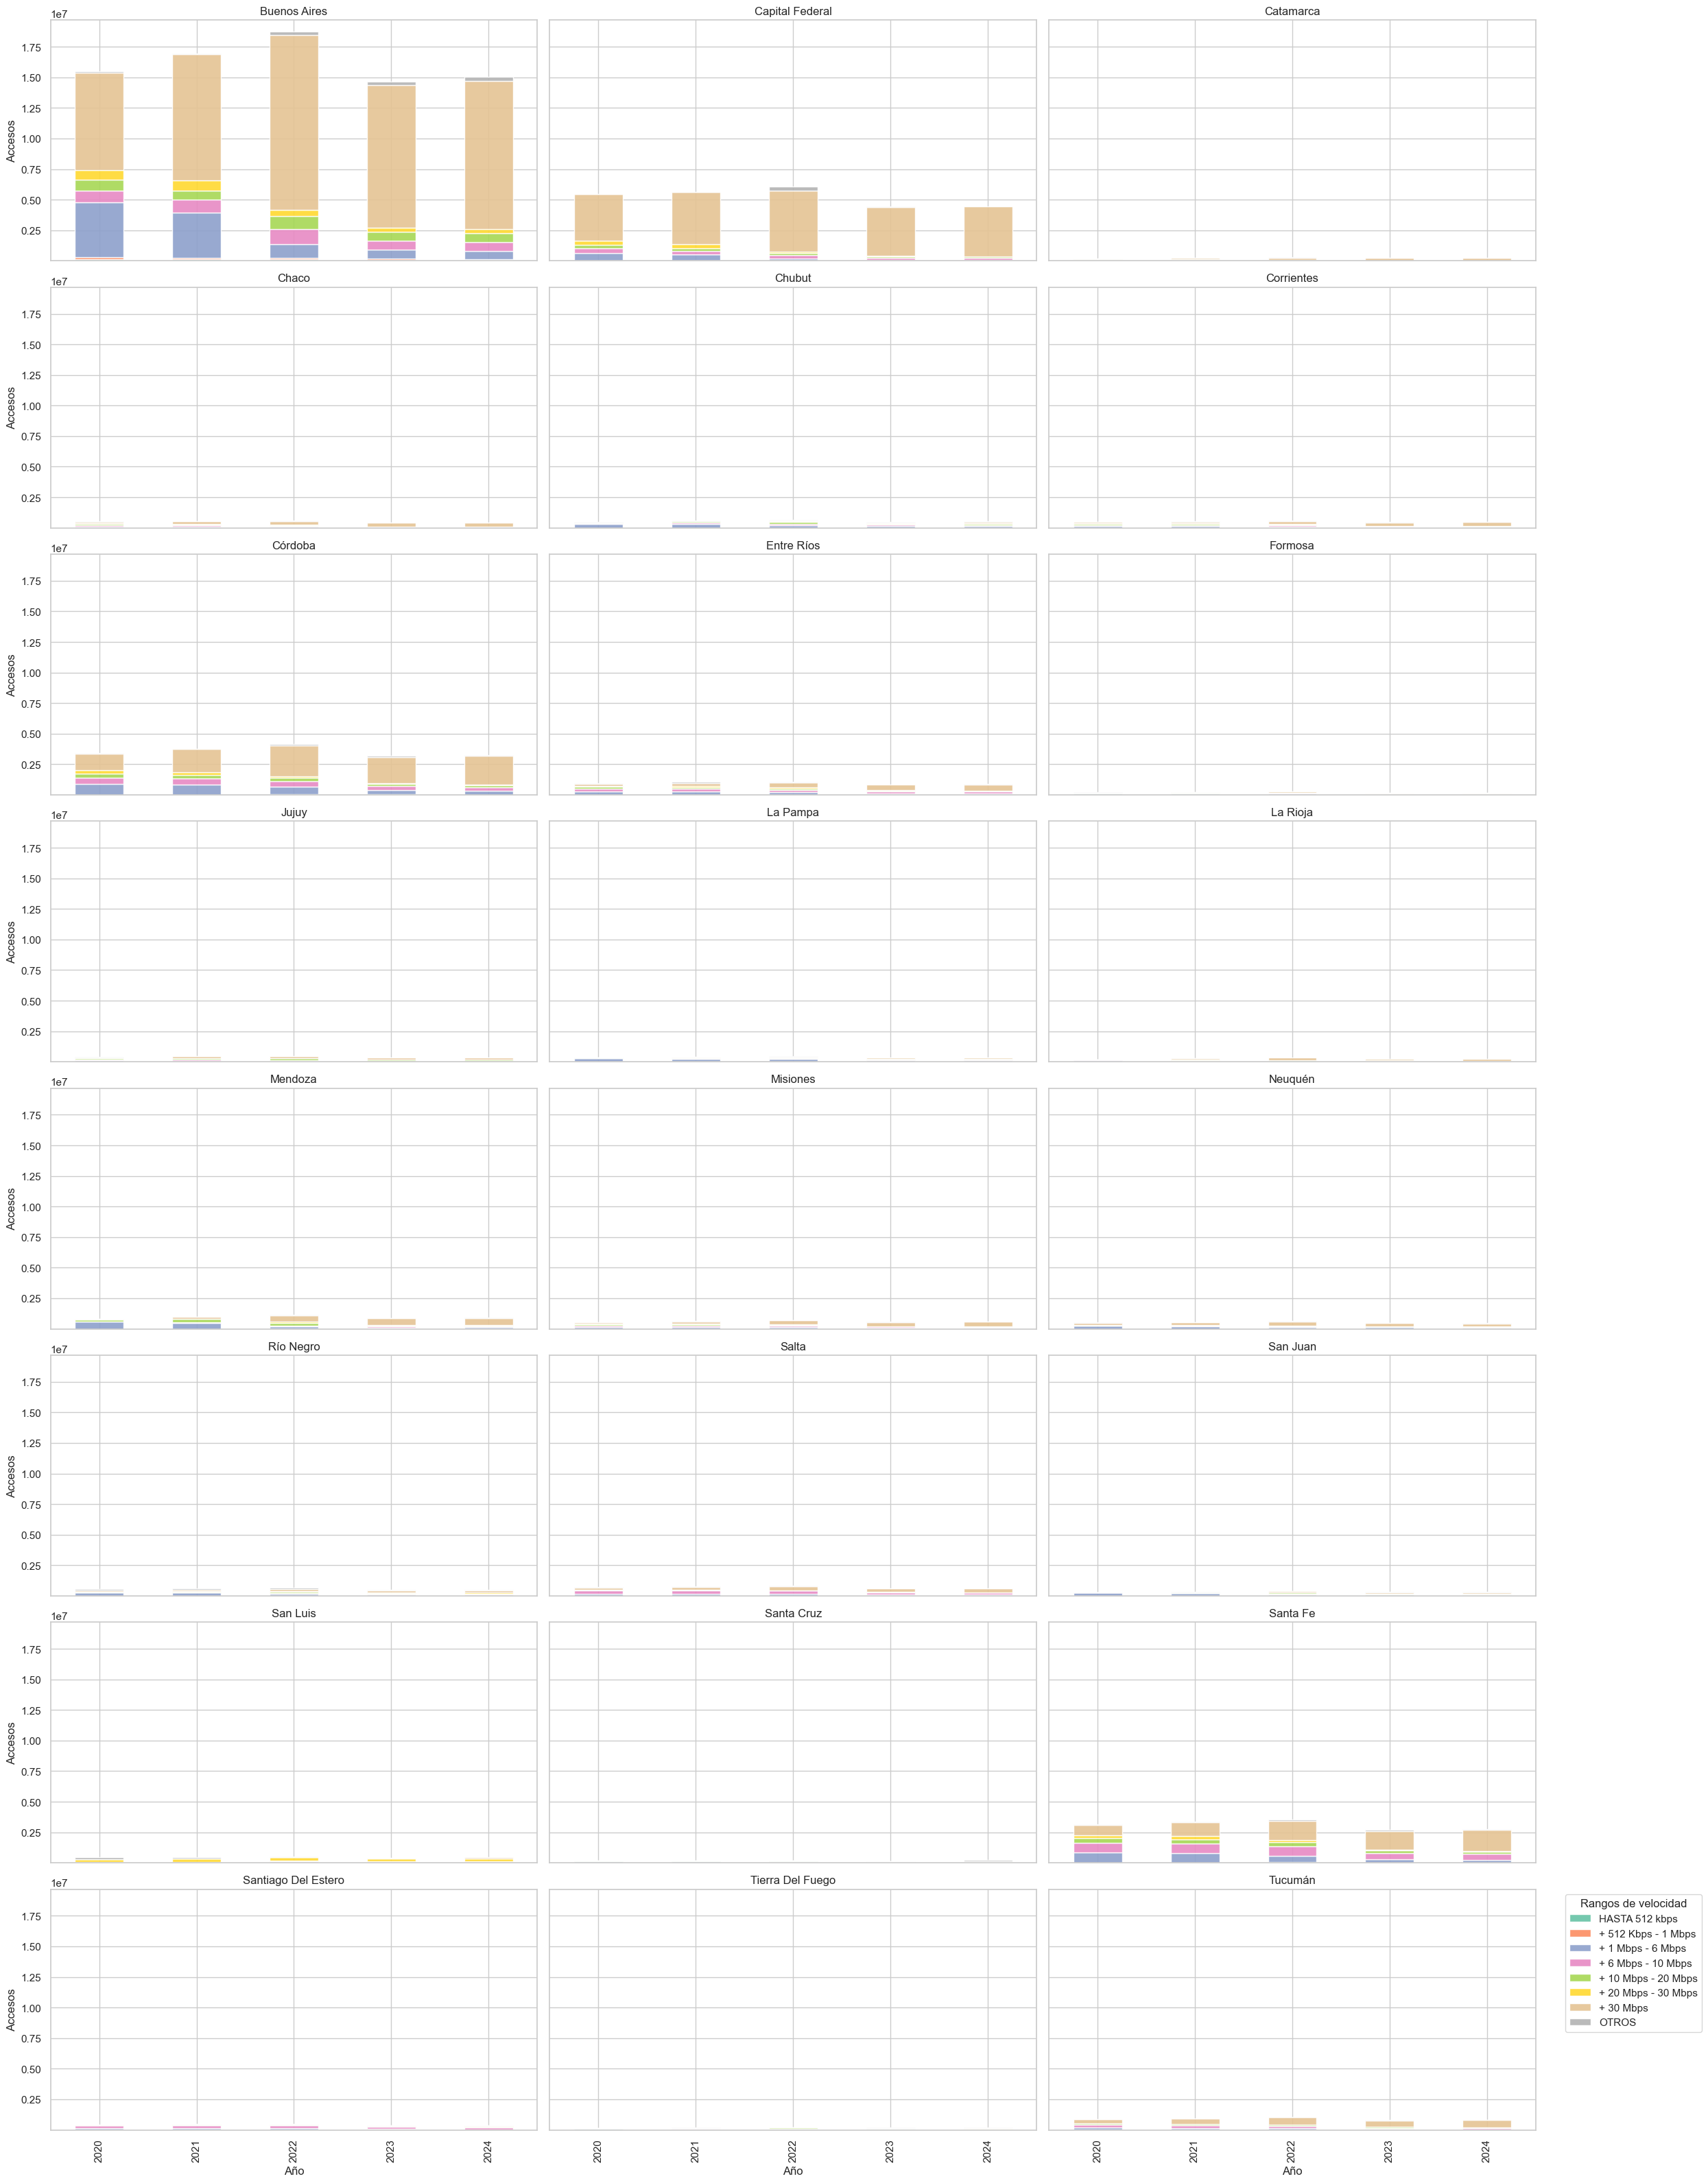

In [ ]:
df = dic_df["Accesos por rangos"]
cols_acceso = ['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', 
               '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', 
               '+ 30 Mbps', 'OTROS']

# Se agrupa por año y provincia sumando accesos por rango
df_grouped = df.groupby(["Año", "Provincia"])[cols_acceso].sum().reset_index()


provincias = df_grouped["Provincia"].unique()
num_provincias = len(provincias)
ncols = 3 
nrows = np.ceil(num_provincias / ncols).astype(int)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 4 * nrows), sharex=True, sharey=True)
axes = axes.flatten()
palette = sns.color_palette("Set2", n_colors=len(cols_acceso))

for i, provincia in enumerate(provincias):
    ax = axes[i]
    df_prov = df_grouped[df_grouped["Provincia"] == provincia].set_index("Año")[cols_acceso]
    df_prov.plot(kind="bar", stacked=True, ax=ax, color=palette, alpha=0.9)
    
    ax.set_title(provincia)
    ax.set_ylabel("Accesos")
    ax.set_xlabel("Año")
    ax.legend().set_visible(False) #Se oculta la leyenda
plt.legend(cols_acceso, title="Rangos de velocidad", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

- *En el grafico de lineas que representa la evolucion del acceso a internet por provincia en el periodo del 2020 al 2024 puede obsevarse que en un conjunto de 24 provincias,4 de ellas se encuentran  con un notable acceso por encima del resto.*
- *las 4 provincias mas destacadas en el acceso por rango son Buenos Aires se posiciona como la provincia con mayor acceso a internet, seguido por Capital Federal, luego Cordoba y por ultimo Santa Fe.*
- *Otro de los puntos a destacar es que el año 2022 fue un punto de inflexion en donde el acceso ha marcado un maximo en todas las provincias.Cabe resaltar que a partir del año 2020 como es de publico conocimiento la pandemia del Covid-19 a afectado a la poblacion munidal y tiene sentido que el mercado busque regularizarse en los años posteriores.*

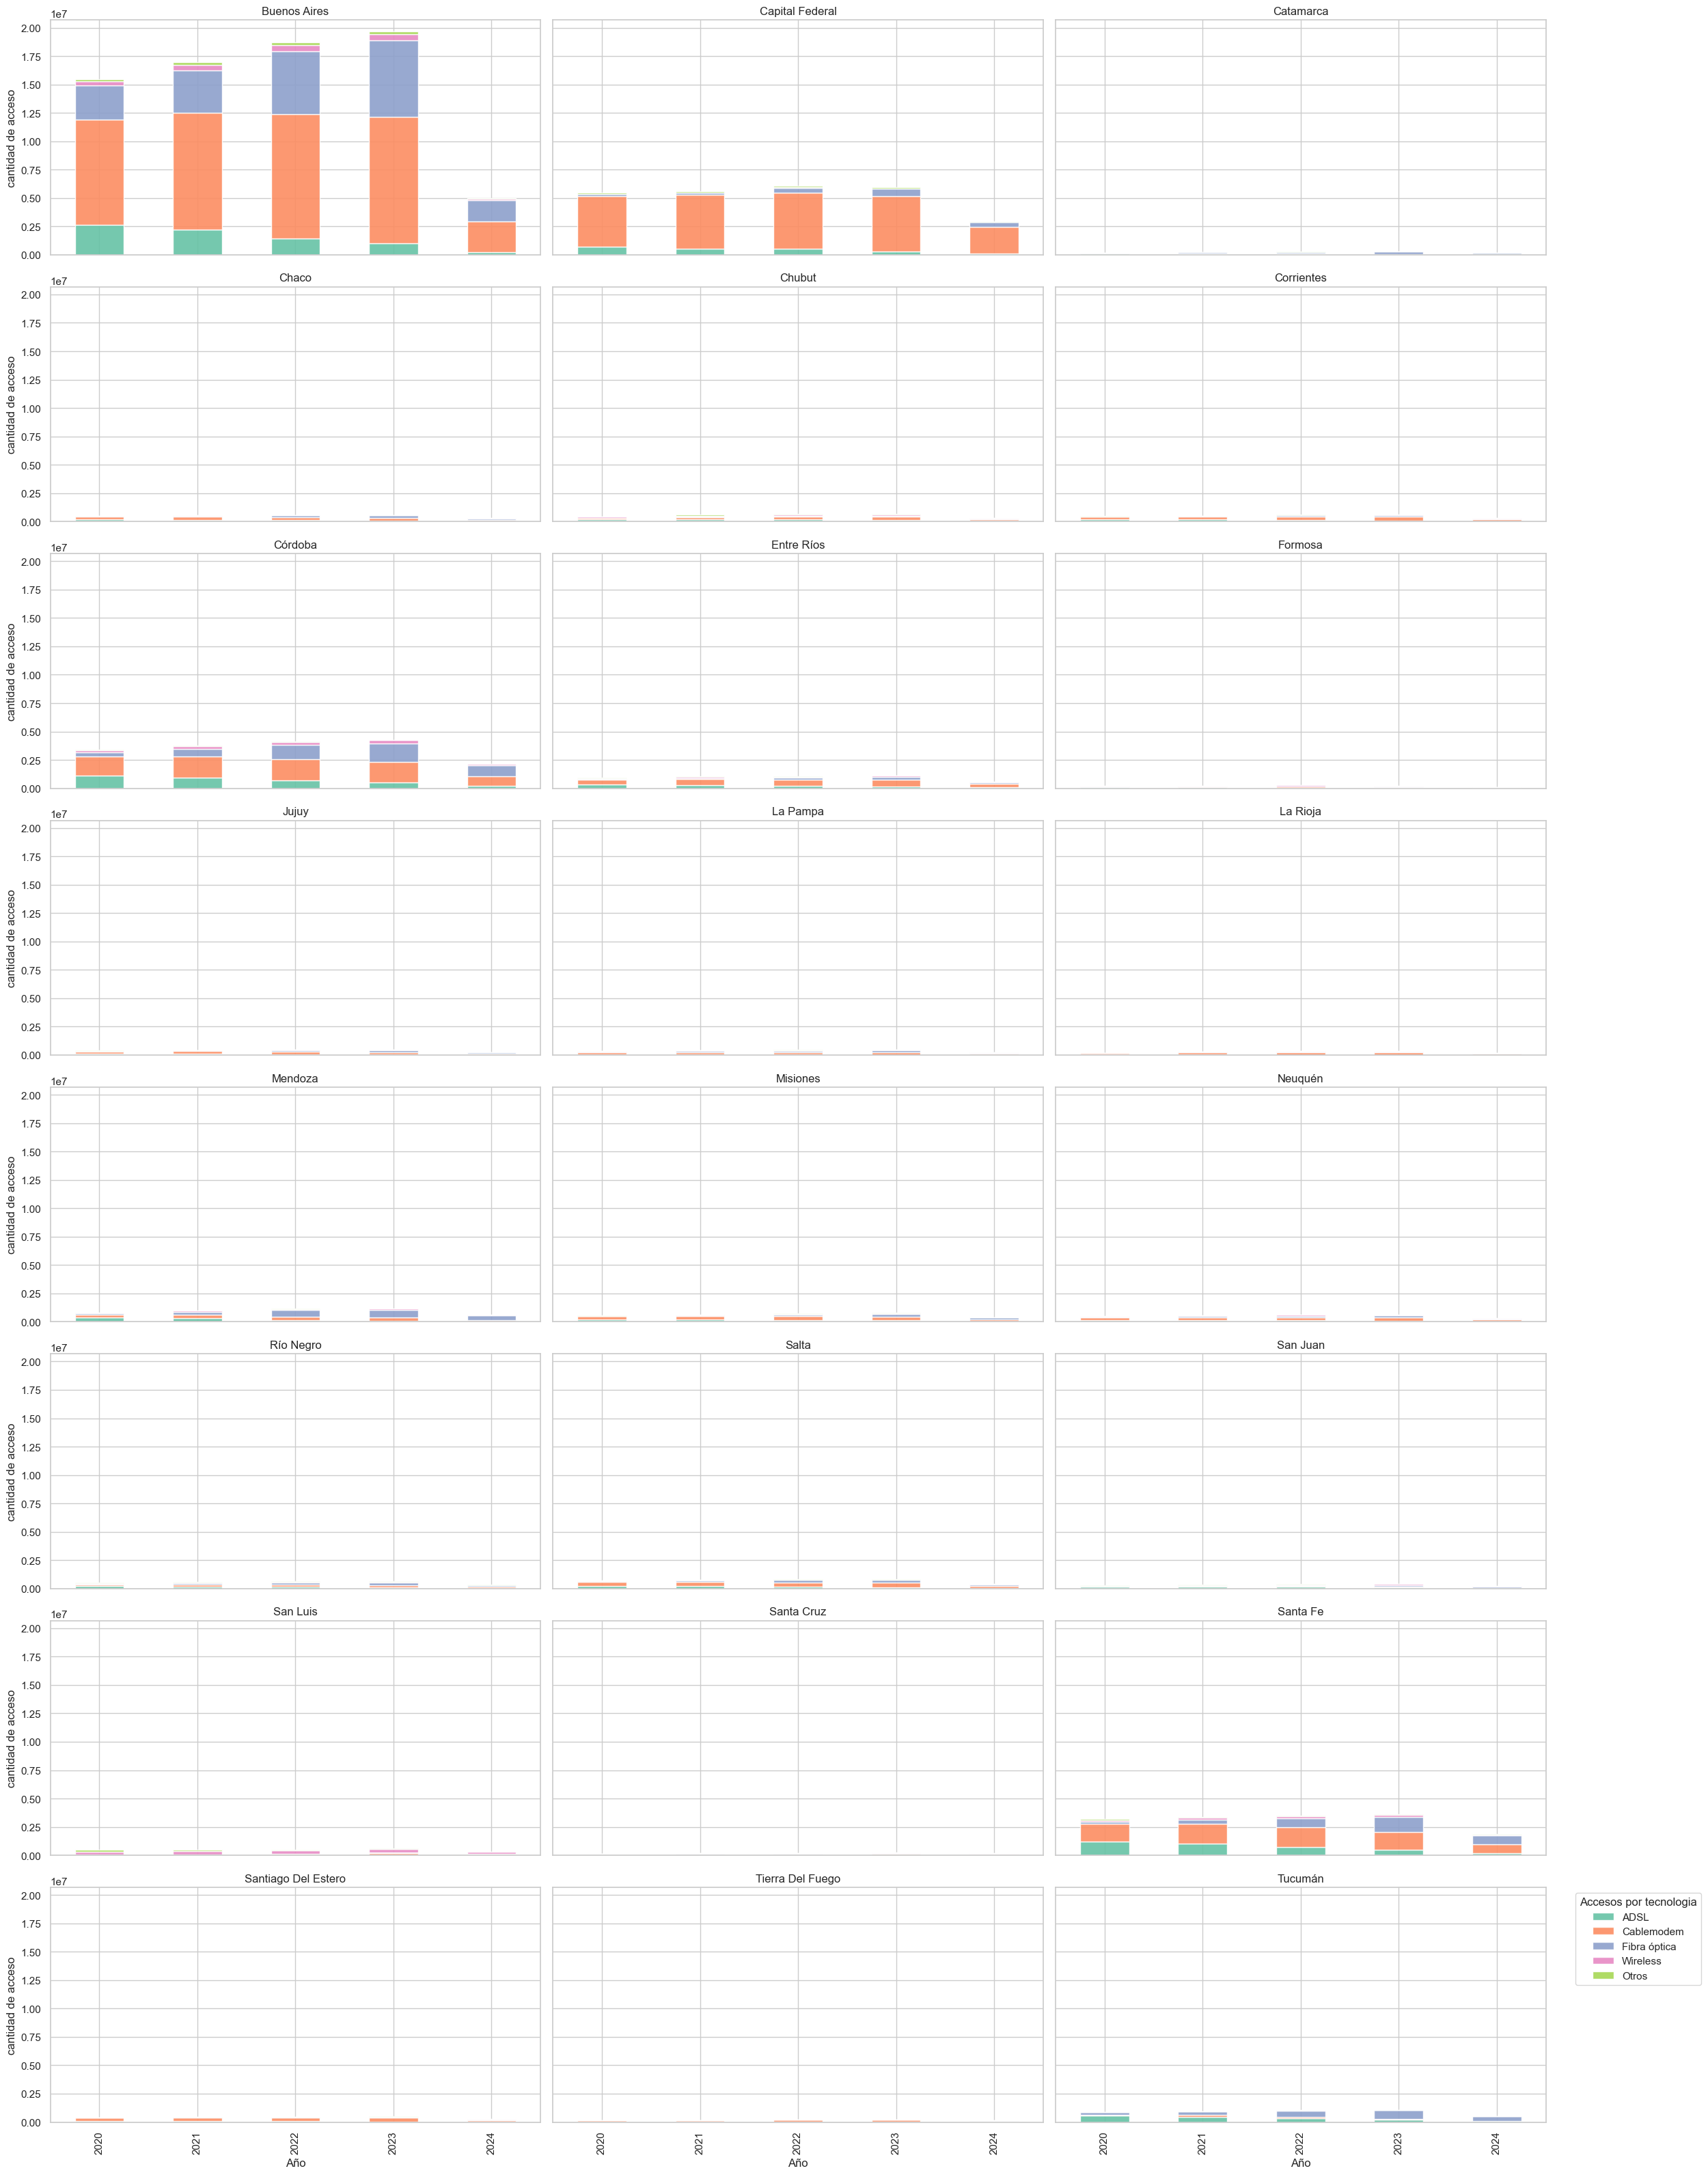

In [ ]:
df = dic_df["Accesos por tecnología"]
cols_acceso = ['ADSL','Cablemodem','Fibra óptica','Wireless','Otros']
df_grouped = df.groupby(["Año", "Provincia"])[cols_acceso].sum().reset_index()
provincias = df_grouped["Provincia"].unique()

# Se calculan cuántos subgráficos se necesita
num_provincias = len(provincias)
ncols = 3 
nrows = np.ceil(num_provincias / ncols).astype(int)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 4 * nrows), sharex=True, sharey=True)
axes = axes.flatten()
palette = sns.color_palette("Set2", n_colors=len(cols_acceso))

# Se itera sobre cada provincia
for i, provincia in enumerate(provincias):
    ax = axes[i]
    
    # Se filtran los datos por provincia
    df_prov = df_grouped[df_grouped["Provincia"] == provincia].set_index("Año")[cols_acceso]
    df_prov.plot(kind="bar", stacked=True, ax=ax, color=palette, alpha=0.9)
    
    ax.set_title(provincia)
    ax.set_ylabel("cantidad de acceso")
    ax.set_xlabel("Año")
    ax.legend().set_visible(False) #Se oculta la leyenda
plt.legend(cols_acceso, title="Accesos por tecnologia", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

- *En el grafico anterior se pueden distiguir los siguientes puntos.*
- *Las provincias con mayor conectividad se mantienen al igual que en accesos por rangos*
- *La tecnologia ADSL va en deshuso*
- *En comparacion con años anteirores solo se tiene registrado hasta el 2do trimestre del año 2024 por lo que es visible la menor cantidad de datos*
- *Hay un mayor crecimiento del uso de la fibra optica*
- *el uso del cablemodem esta experimentando un leve deshuso*
- *El uso de Wireless en la provincia de Buenos Aires, Cordoba y Santa Fe es minimamente superiror de la Fibra Optica.*

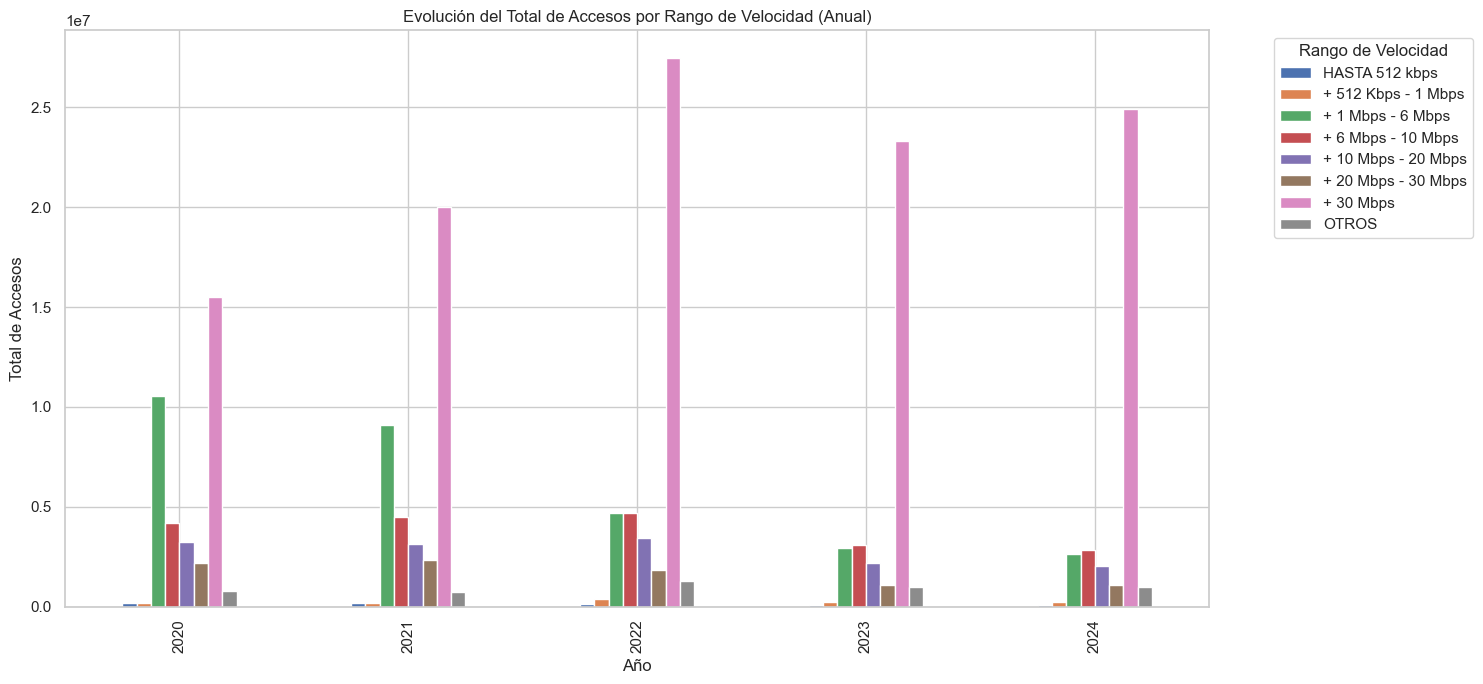

In [ ]:
df = dic_df["Accesos por rangos"]
cols_rango = ['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', 
               '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', 
               '+ 30 Mbps', 'OTROS']

df_grouped = dic_df['Accesos por rangos'].groupby('Año')[cols_rango].sum()
ax = df_grouped.plot(kind='bar', figsize=(15, 7))

ax.set_title('Evolución del Total de Accesos por Rango de Velocidad (Anual)')
ax.set_xlabel('Año')
ax.set_ylabel('Total de Accesos')
ax.legend(title='Rango de Velocidad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

- *Se puede distinguir los siguientes puntos:*
- *En Argentina la velocidad en auge es +30Mbps*
- Como se distinguio anteriormente el año 2022 mostro un fuerte incremento en esa velocidad de bajada pero la correccion ha sido relativamente baja y se mantiene en crecimiento*
- *Hasta el año 2022 la 2da velocidad mas utilizada era de +1Mbps -6Mbps,coincidiendo con el aumento de  +30Mbps por lo que sepuede deducir que los usuarios han comenzado a consumir mas velocidad de bajada al igual que ocurre con -512Mbps*

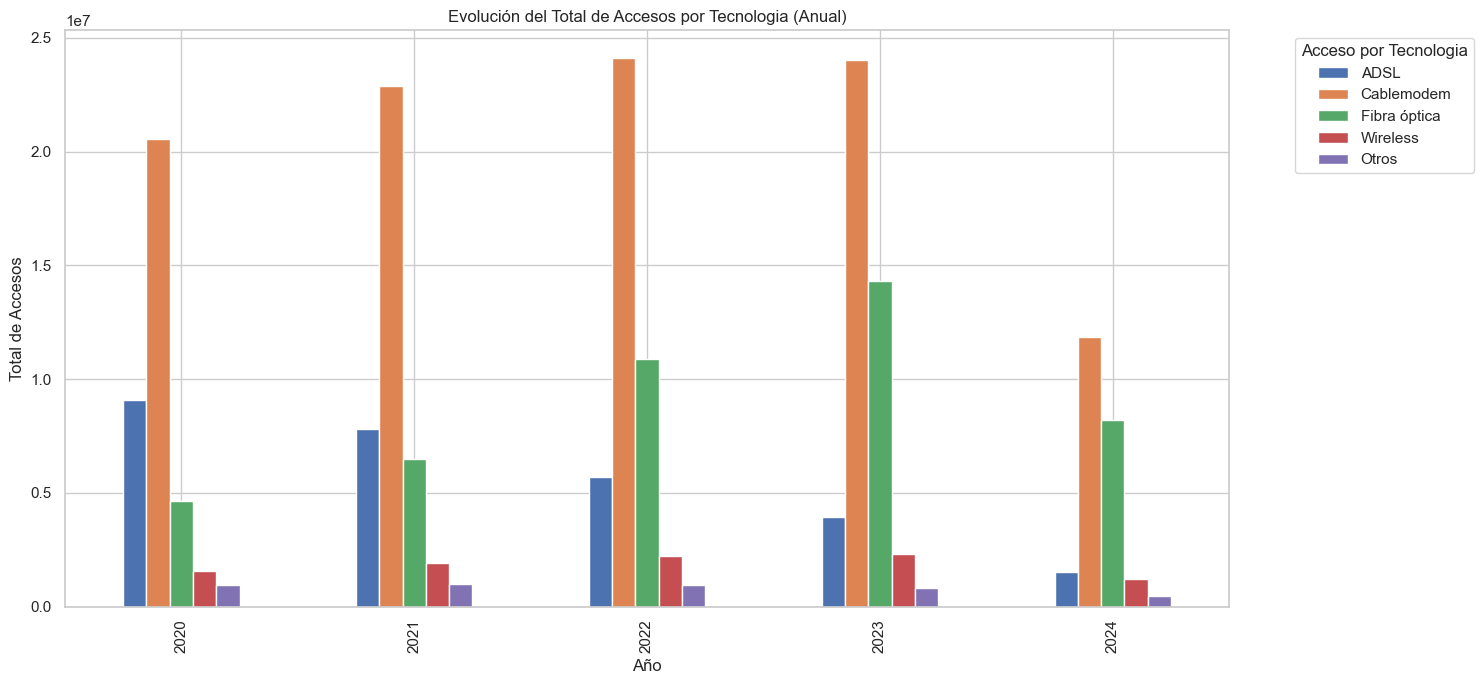

In [ ]:
df = dic_df["Totales accesos por tecnología"]
cols_rango = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Periodo']
df_grouped = dic_df['Totales accesos por tecnología'].groupby('Año')[cols_rango].sum()
ax = df_grouped.plot(kind='bar', figsize=(15, 7)) 

ax.set_title('Evolución del Total de Accesos por Tecnologia (Anual)')
ax.set_xlabel('Año')
ax.set_ylabel('Total de Accesos')
ax.legend(title='Acceso por Tecnologia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

- *En el año 2022 el acceso por Fibra Optica se ha incrementado*
- El acceso de CableModem ha crecido hasta 2022 y al parecer ha experimentado un leve decrecimiento a partir de esa fecha, aunque sigue siendo el medio mas usado*

In [ ]:
for nombre, df in dic_df.items():
    explorar_df(nombre, df)

Explorando: Accesos por rangos
Dimensiones: (432, 12)
Columnas: ['Año', 'Trimestre', 'Provincia', 'HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS', 'Total']
Tipos de datos:
Año                      int64
Trimestre                int64
Provincia               object
HASTA 512 kbps         float64
+ 512 Kbps - 1 Mbps    float64
+ 1 Mbps - 6 Mbps      float64
+ 6 Mbps - 10 Mbps     float64
+ 10 Mbps - 20 Mbps    float64
+ 20 Mbps - 30 Mbps    float64
+ 30 Mbps              float64
OTROS                  float64
Total                  float64
dtype: object
Nulos por columna:
Año                    0
Trimestre              0
Provincia              0
HASTA 512 kbps         0
+ 512 Kbps - 1 Mbps    0
+ 1 Mbps - 6 Mbps      0
+ 6 Mbps - 10 Mbps     0
+ 10 Mbps - 20 Mbps    0
+ 20 Mbps - 30 Mbps    0
+ 30 Mbps              0
OTROS                  0
Total                  0
dtype: int64
-------

In [ ]:
dic_df["Ingresos de internet"]

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2024,2,"442,032,166.69",Abr-Jun 2024
1,2024,1,"346,198,986.13",Ene-Mar 2024
2,2023,4,"167,376,014.80",Oct-Dic 2023
3,2023,3,"133,106,593.41",Jul-Sept 2023
4,2023,2,"118,060,280.28",Jun-Mar 2023
5,2023,1,"104,134,992.81",Ene-Mar 2023
6,2022,4,"72,443,482.99",Oct-Dic 2022
7,2022,3,"64,086,784.33",Jul-Sept 2022
8,2022,2,"60,419,500.62",Abr-Jun 2022
9,2022,1,"55,219,313.01",Ene-Mar 2022


### Con el fin de generar KPI en el futuro se cran modelos de prediccion para corroborar si se estan cumpliendo los objetivos.

*Se abordará el tema mas adelante*

In [ ]:
df_ingresos = dic_df["Ingresos de internet"].copy()
def limpiar_y_convertir_anio(df):
    df = df[pd.to_numeric(df['Año'], errors='coerce').notna()]
    df['Año'] = df['Año'].astype(int)
    return df

def limpiar_y_convertir_trimestre(df):
    df['Trimestre'] = df['Trimestre'].astype(int)
    return df
df_ingresos = limpiar_y_convertir_anio(df_ingresos)
df_ingresos = limpiar_y_convertir_trimestre(df_ingresos)

# Modelo predictivo
modelo_ingresos = LinearRegression()
X_ingresos = df_ingresos[["Año", "Trimestre"]]
y_ingresos = df_ingresos["Ingresos (miles de pesos)"]
modelo_ingresos.fit(X_ingresos, y_ingresos)

# Generar trimestres futuros hasta el 2do trimestre de 2025
futuro_trimestres = pd.DataFrame({"Año": [], "Trimestre": []})
for año in range(df_ingresos["Año"].max(), 2026):
    for trimestre in range(1, 5):
        if año == 2025 and trimestre > 2:
            break  # Detener en el 2do trimestre de 2025
        futuro_trimestres = pd.concat([futuro_trimestres, pd.DataFrame({"Año": [año], "Trimestre": [trimestre]})], ignore_index=True)

predicciones_ingresos = modelo_ingresos.predict(futuro_trimestres)

# Se agregan predicciones al DataFrame de trimestres futuros
futuro_trimestres["Ingresos (miles de pesos)"] = predicciones_ingresos

# Se concatenan los DataFrames
df_ingresos["Tipo"] = "Original"
futuro_trimestres["Tipo"] = "Predicción"

predict_ingresos = pd.concat([df_ingresos, futuro_trimestres], ignore_index=True)
predict_ingresos = predict_ingresos.sort_values(by=["Año", "Trimestre"])

print(predict_ingresos)

        Año  Trimestre  Ingresos (miles de pesos)        Periodo        Tipo
17 2,020.00       1.00              29,946,216.45   Ene-Mar 2020    Original
16 2,020.00       2.00              32,102,475.99   Abr-Jun 2020    Original
15 2,020.00       3.00              31,997,444.53  Jul-Sept 2020    Original
14 2,020.00       4.00              33,539,702.72   Oct-Dic 2020    Original
13 2,021.00       1.00              36,676,371.36   Ene-Mar 2021    Original
12 2,021.00       2.00              38,239,666.63   Abr-Jun 2021    Original
11 2,021.00       3.00              42,999,944.29  Jul-Sept 2021    Original
10 2,021.00       4.00              45,467,887.17   Oct-Dic 2021    Original
9  2,022.00       1.00              55,219,313.01   Ene-Mar 2022    Original
8  2,022.00       2.00              60,419,500.62   Abr-Jun 2022    Original
7  2,022.00       3.00              64,086,784.33  Jul-Sept 2022    Original
6  2,022.00       4.00              72,443,482.99   Oct-Dic 2022    Original

- *Se decide eliminar la columna periodo ya que generar datos nan en el modelo de prediccion y realmente no se concidera de gra utilidad.*

In [ ]:
predict_ingresos = predict_ingresos.drop(columns=["Periodo"])

- *Se exporta a excel el df con las predicciones llamado predict_ingresos*

In [ ]:
predict_ingresos.to_excel(r'C:\Users\Rocio\Desktop\Proyecto Data Analyst\PI\data_powerbi/predic_ongresos.xlsx')

- *A continuacion se grafican la correlacion de la alta velocidad de internet con los ingresos* 

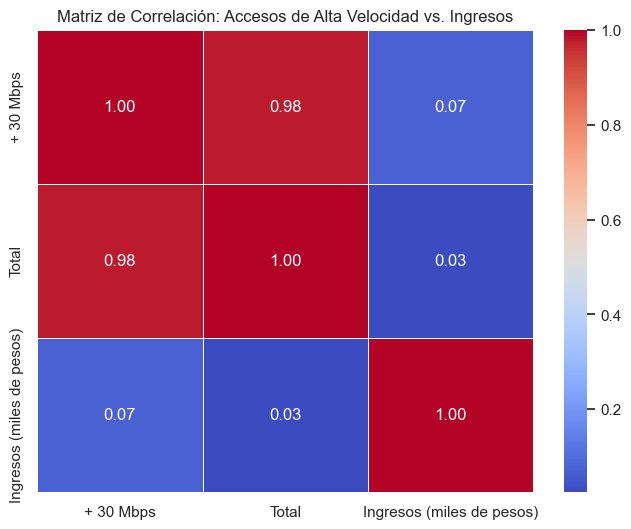

In [ ]:
df_accesos = dic_df["Accesos por rangos"]
df_ingresos = dic_df["Ingresos de internet"]

# Se fusionan los datos por Año y Trimestre
df_merged = pd.merge(df_accesos, df_ingresos, on=["Año", "Trimestre"], how="inner")
columnas_interes = ["+ 30 Mbps", "Total", "Ingresos (miles de pesos)"]
df_corr = df_merged[columnas_interes]
correlation_matrix = df_corr.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación: Accesos de Alta Velocidad vs. Ingresos")
plt.show()


- *Se realiza un modelo de prediccion de los accesos por rango para todos los trimestres hasta el 1er trimestre del año 2026*

In [ ]:
df_accesos_rangos = dic_df["Accesos por rangos"].copy()
columnas_a_predecir = ["HASTA 512 kbps", "+ 512 Kbps - 1 Mbps", "+ 1 Mbps - 6 Mbps", "+ 6 Mbps - 10 Mbps", "+ 10 Mbps - 20 Mbps", "+ 20 Mbps - 30 Mbps", "+ 30 Mbps", "OTROS", "Total"]

# Diccionario para almacenar los modelos de regresión
modelos = {}

# Se entrenan modelos para cada columna
for columna in columnas_a_predecir:
    modelo = LinearRegression()
    X = df_accesos_rangos[["Año", "Trimestre"]]
    y = df_accesos_rangos[columna]
    modelo.fit(X, y)
    modelos[columna] = modelo

# Se generar los trimestres futuros
futuro_trimestres = pd.DataFrame({"Año": [], "Trimestre": []})
for año in range(2024, 2026):
    for trimestre in range(1, 5):
        if año == 2024 and trimestre < 2:
            continue
        if año == 2025 and trimestre > 2:
            break
        futuro_trimestres = pd.concat([futuro_trimestres, pd.DataFrame({"Año": [año], "Trimestre": [trimestre]})], ignore_index=True)

# Se inicializar las columnas de predicción con NaN
for columna in columnas_a_predecir:
    futuro_trimestres[columna] = float('nan')

# Se realizan predicciones para cada columna
for columna, modelo in modelos.items():
    predicciones = modelo.predict(futuro_trimestres[["Año", "Trimestre"]])
    futuro_trimestres[columna] = predicciones

# Concatenar DataFrames
df_accesos_rangos["Tipo"] = "Original"
futuro_trimestres["Tipo"] = "Predicción"
predict_acc_x_rango = pd.concat([df_accesos_rangos, pd.merge(futuro_trimestres, df_accesos_rangos[["Provincia"]].drop_duplicates()
                    , left_index=True, right_index=True)], ignore_index=True)

predict_acc_x_rango = predict_acc_x_rango.sort_values(by=["Año", "Trimestre"], ascending=[False, True])
print(predict_acc_x_rango)

         Año  Trimestre            Provincia  HASTA 512 kbps  \
435 2,025.00       1.00                Chaco        1,040.33   
436 2,025.00       2.00               Chubut        1,029.99   
24  2,024.00       1.00         Buenos Aires       26,002.00   
25  2,024.00       1.00      Capital Federal          516.00   
26  2,024.00       1.00            Catamarca           71.00   
..       ...        ...                  ...             ...   
355 2,020.00       4.00           Santa Cruz           47.00   
356 2,020.00       4.00             Santa Fe          518.00   
357 2,020.00       4.00  Santiago Del Estero          123.00   
358 2,020.00       4.00     Tierra Del Fuego           17.00   
359 2,020.00       4.00              Tucumán           29.00   

     + 512 Kbps - 1 Mbps  + 1 Mbps - 6 Mbps  + 6 Mbps - 10 Mbps  \
435             4,102.95           8,103.97           40,760.76   
436             3,973.74           4,183.95           41,166.11   
24             22,510.00      

- *A continuacion se exportaran los df como archivos excel en la carpeta data_powerbi para poder usarlos en el dashboard*

In [ ]:
output_folder = "data_powerbi"
os.makedirs(output_folder, exist_ok=True)
for nombre_df, df in dic_df.items():
    nombre_archivo = os.path.join(output_folder, f"{nombre_df}.xlsx")
    df.to_excel(nombre_archivo, index=False)  # Guardar sin índice

In [ ]:
predict_acc_x_rango.to_excel(r'C:\Users\Rocio\Desktop\Proyecto Data Analyst\PI\data_powerbi/predict_acc_x_rango.xlsx')

- *Se utiliza un modelo de regresion lineal para predecir cual sera la penetracion cada 100 hogares para los proximos años. en el periodo que va desde 2024 hasta 1er trimestre del 2026*
- *Se concatena el resultado al df penetracion por hogares internet y se crea un nuevo df*

In [ ]:
file_path = r"C:\Users\Rocio\Desktop\Proyecto Data Analyst\PI\data_powerbi\Penetración hogares internet.xlsx"
df_penetracion_hogares = pd.read_excel(file_path)

df_penetracion_hogares["Año"] = df_penetracion_hogares["Año"].astype(int)
df_penetracion_hogares["Trimestre"] = df_penetracion_hogares["Trimestre"].astype(int)
provincias = df_penetracion_hogares["Provincia"].unique()

# Lista para almacenar DataFrames de predicciones por provincia
lista_predicciones = []

# Se itera sobre cada provincia y se entrena un modelo individual
for provincia in provincias:
    df_provincia = df_penetracion_hogares[df_penetracion_hogares["Provincia"] == provincia]


    X = df_provincia[["Año", "Trimestre"]]
    y = df_provincia["Accesos por cada 100 hogares"]
    modelo_internet = LinearRegression()
    modelo_internet.fit(X, y)

    # Se generan predicciones
    futuro_trimestres = pd.DataFrame({"Año": [], "Trimestre": []})

    # Se crean todos los trimestres futuros
    for año in range(df_provincia["Año"].max(), 2027):
        for trimestre in range(1, 5):
            if año == 2026 and trimestre > 1:
                break
            futuro_trimestres = pd.concat([futuro_trimestres, pd.DataFrame({"Año": [año], "Trimestre": [trimestre]})], ignore_index=True)

    predicciones_futuras = modelo_internet.predict(futuro_trimestres)
# Agregar las predicciones al DataFrame de trimestres futuros
    futuro_trimestres["Accesos por cada 100 hogares"] = predicciones_futuras
# Agregar la provincia al DataFrame de predicciones
    futuro_trimestres["Provincia"] = provincia
# Agregar el DataFrame a la lista de predicciones
    lista_predicciones.append(futuro_trimestres)

predicciones_totales = pd.concat(lista_predicciones, ignore_index=True)
predicciones_totales = predicciones_totales.sort_values(by=["Año", "Trimestre"])

# Filtrar las predicciones para que comiencen desde el tercer trimestre de 2024
predicciones_totales = predicciones_totales[
    (predicciones_totales["Año"] > 2024) | 
    ((predicciones_totales["Año"] == 2024) & (predicciones_totales["Trimestre"] >= 3))
]

# Se concatenan los DataFrames
df_penetracion_predictiva = pd.concat([df_penetracion_hogares, predicciones_totales], ignore_index=True)

# Ordenar el DataFrame final por año y trimestre
df_penetracion_predictiva = df_penetracion_predictiva.sort_values(by=["Año", "Trimestre"], ascending=[False, True])
print(df_penetracion_predictiva)

         Año  Trimestre            Provincia  Accesos por cada 100 hogares
576 2,026.00       1.00         Buenos Aires                         90.11
577 2,026.00       1.00      Capital Federal                        127.17
578 2,026.00       1.00            Catamarca                         84.90
579 2,026.00       1.00                Chaco                         46.71
580 2,026.00       1.00               Chubut                        101.99
..       ...        ...                  ...                           ...
355 2,020.00       4.00           Santa Cruz                         37.00
356 2,020.00       4.00             Santa Fe                         73.58
357 2,020.00       4.00  Santiago Del Estero                         43.75
358 2,020.00       4.00     Tierra Del Fuego                         76.27
359 2,020.00       4.00              Tucumán                         54.78

[600 rows x 4 columns]


In [ ]:
df_penetracion_predictiva['Año'] =df_penetracion_predictiva['Año'].astype(int)
df_penetracion_predictiva['Trimestre'] = df_penetracion_predictiva['Trimestre'].astype(int)

In [ ]:
df_penetracion_predictiva

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
576,2026,1,Buenos Aires,90.11
577,2026,1,Capital Federal,127.17
578,2026,1,Catamarca,84.90
579,2026,1,Chaco,46.71
580,2026,1,Chubut,101.99
...,...,...,...,...
355,2020,4,Santa Cruz,37.00
356,2020,4,Santa Fe,73.58
357,2020,4,Santiago Del Estero,43.75
358,2020,4,Tierra Del Fuego,76.27


In [ ]:
df_penetracion_predictiva.to_excel(r'C:\Users\Rocio\Desktop\Proyecto Data Analyst\PI\data_powerbi/penetracion_int_predic.xlsx')
